# Multi-layer Feed Forward Network Program on MNIST (Image) Dataset

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Function to display a grid of 9 images along with their corresponding labels
def display_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

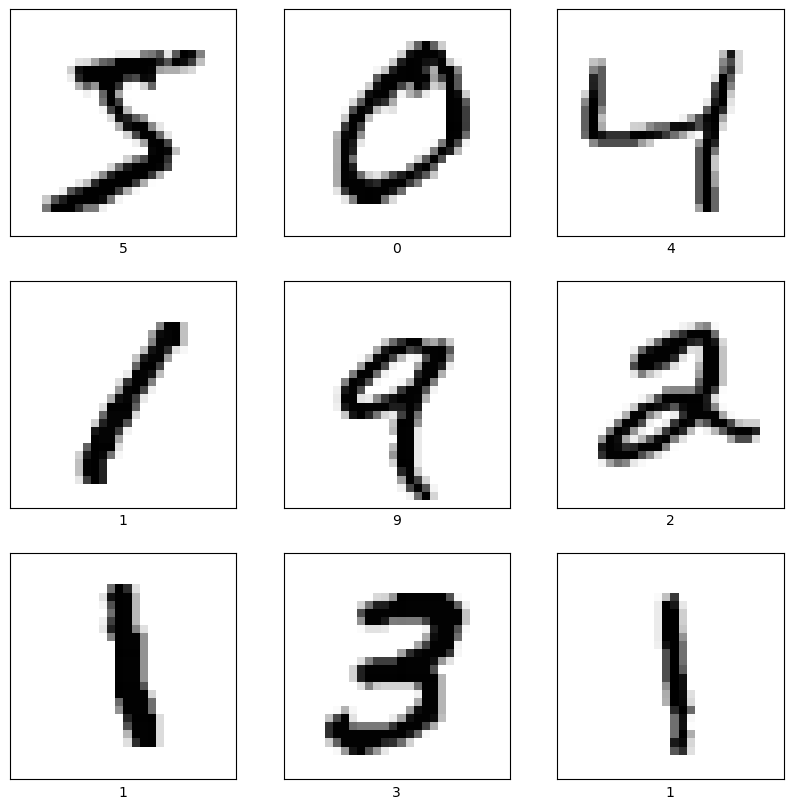

In [5]:
# Display images from the training dataset
display_images(train_images, train_labels)

# Load and Preprocess the MNIST Dataset
Load the MNIST dataset and preprocess it by normalizing the pixel values and converting the labels to one-hot vectors.

In [6]:
# Preprocess the data
from keras.utils import to_categorical

In [7]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [8]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [9]:
# Convert labels to one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Implement Multi-layer Feed Forward Neural Network
Implement a multi-layer feed forward neural network using a deep learning library such as TensorFlow or PyTorch.

In [10]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# Define the model
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [13]:
# Train the model
model.fit(
  train_images,
  train_labels,
  epochs=1,
  batch_size=32,
)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 806us/step - accuracy: 0.8187 - loss: 0.5837


In [14]:
# Evaluate the model
model.evaluate(
  test_images,
  test_labels
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.9296 - loss: 0.2351


[0.2114042043685913, 0.9375]

In [18]:
from sklearn.metrics import classification_report
import numpy as np

In [19]:
# Predict the labels for test data
pred_probs = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


In [20]:
# Get the class with the highest probability
pred_labels = np.argmax(pred_probs, axis=1)

In [21]:
# Convert test labels back to original form
test_labels_orig = np.argmax(test_labels, axis=1)

In [22]:
# Generate the classification report
report = classification_report(test_labels_orig, pred_labels)

In [23]:
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.96      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.95      0.94       982
           5       0.91      0.92      0.92       892
           6       0.96      0.94      0.95       958
           7       0.89      0.96      0.92      1028
           8       0.91      0.90      0.91       974
           9       0.96      0.88      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# Train the Network with Different Configurations and Activation Functions
Train the neural network with different configurations (number of layers, number of neurons per layer) and activation functions (ReLU, sigmoid, tanh).

In [24]:
# Define different configurations
configurations = [
    {'layers': [32, 32], 'activation': 'relu'},
    {'layers': [64, 64], 'activation': 'relu'},
    {'layers': [32, 32], 'activation': 'sigmoid'},
    {'layers': [64, 64], 'activation': 'sigmoid'},
    {'layers': [32, 32], 'activation': 'tanh'},
    {'layers': [64, 64], 'activation': 'tanh'},
]

In [25]:
# Train and evaluate a model for each configuration
for config in configurations:
    # Define the model
    model = Sequential()
    model.add(Dense(config['layers'][0], activation=config['activation'], input_shape=(784,)))
    for layer_size in config['layers'][1:]:
        model.add(Dense(layer_size, activation=config['activation']))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model
    model.fit(
      train_images,
      train_labels,
      epochs=1,
      batch_size=32,
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(
      test_images,
      test_labels
    )
    print(f'Configuration: {config}, Loss: {loss}, Accuracy: {accuracy}\n')

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - accuracy: 0.7692 - loss: 0.7377
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9074 - loss: 0.3120
Configuration: {'layers': [32, 32], 'activation': 'relu'}, Loss: 0.2721126675605774, Accuracy: 0.9207000136375427

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step - accuracy: 0.8262 - loss: 0.5739
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.9331 - loss: 0.2133
Configuration: {'layers': [64, 64], 'activation': 'relu'}, Loss: 0.1898980587720871, Accuracy: 0.9419000148773193

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 664us/step - accuracy: 0.6782 - loss: 1.2628
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8943 - loss: 0.3801
Configuration: {'layers': [32, 32], 'activation': 'sigmoid'}, Loss: 0.33872830867767334, Accuracy: 0.9075000286102295

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.7387 - loss: 1.0011
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.9115 - loss: 0.2938
Configuration: {'layers': [

# Plot Confusion Matrix
Plot the confusion matrix to visualize the performance of the network on the test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


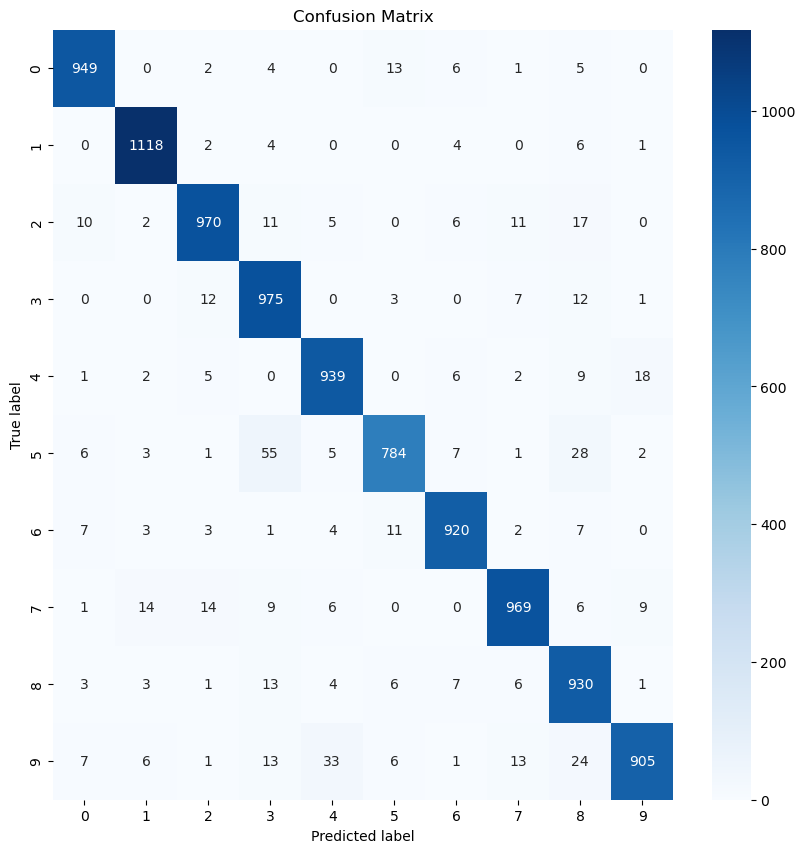

In [26]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels of the test set
y_pred = model.predict(test_images)

# Convert the one-hot vectors to labels
y_pred_labels = np.argmax(y_pred, axis=1)
test_labels_single_digit = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels_single_digit, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()